In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools
from sympy import *
from scipy.integrate import odeint
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

# Exercise 1
Prove $ \frac{dv^{2}}{dt} = 2v\frac{dv}{dt} = 2v\dot{v}$

$\frac{d}{dt}v^{2} = \frac{d}{dt}vv = \dot{v}v + v\dot{v} = 2v\dot{v}$

# Exercise 2
Consider a particle in two dimension, $x$ and $y$. The particle has mass $m$. The potential energy is given by $V = \frac{1}{2}k(x^{2}+y^{2})$. Work out the equations of motion. Show that there are circular orbits and that all orbits have the same period. Show that energy is Conserved

$\vec{F}_{i} = -\frac{\partial V}{\partial X_{i}} = m\ddot{x_{i}}$

$\frac{\partial V}{\partial x} = kx$

$\frac{\partial V}{\partial y} = ky$

$\implies \vec{F}_{x} = -kx = m\ddot{x} , \vec{F}_{y} = -ky = m\ddot{y}$

$\implies \ddot{x} = -\frac{k}{m}x, \ddot{y} = -\frac{k}{m}y$

Let $w^{2} = \frac{k}{m}$

$\implies m\ddot{x} = -w^{2}x, m\ddot{y} = -w^{2}y$

Which looks familiar. Circular motion is given by:

$x(t) = \alpha cos(wt)$

$y(t) = \beta sin(wt)$

so...

$\dot{x} = -\alpha w sin(wt)$

$\ddot{x} = -\alpha w^{2} cos(wt)$

$\dot{y} = \beta w cos(wt)$

$\ddot{y} = -\beta w^{2} sin(wt)$

$-\alpha w^{2} cos(wt) = -w^{2}\alpha cos(wt)$

and

$-\beta w^{2} sin(wt) = -w^{2} \beta sin(wt)$

The period of the orbit is given by $T = \frac{2\pi}{w}$. 

$w = \sqrt{\frac{k}{m}}$

Where $k$ and $m$ are constants. This shows that all orbits have the same period.

To prove the conservation of energy, we'll following the same steps as the authors beginning with Eq. (7)

$\sum_{i}m_{i}\dot{x}_{i}\ddot{x}_{i} = -\sum_{i}\dot{x}_{i}\frac{\partial V({x})}{\partial x_{i}}$

$T = \frac{1}{2}\sum_{i}m_{i}\dot{x}_{i}^{2} = \frac{1}{2}[m\dot{y}^{2} + m\dot{x}^{2}]$

$\frac{d T}{d t} = m\dot{y}\ddot{y} + m\dot{x}\ddot{x}$

$\frac{d V}{d t} = \frac{1}{2}k[\frac{d}{dt}x^{2}+\frac{d}{dt}y^{2}] = \frac{1}{2}k[2x\dot{x} + 2y\dot{y}] = kx\dot{x} + ky\dot{y}$


$\ddot{x}_{i} = -\frac{k}{m}x_{i}$

$\implies x_{i} = -\frac{m}{k}\ddot{x}_{i}$


$\implies \frac{d V}{d t}  =  -m\dot{x}\ddot{x} -m\dot{y}\ddot{y}$

$\implies \frac{d T}{d t} + \frac{d V}{d t} =  m\dot{y}\ddot{y} + m\dot{x}\ddot{x}-m\dot{x}\ddot{x} -m\dot{y}\ddot{y} = 0$

Thus energy is conserved

# Exercise 3
Rework exercise 2 with the potential energy defined as $V = \frac{k}{2(x^{2}+y^{2})}$

$\frac{\partial V}{\partial x} = - \frac{4 k x}{\left(2 x^{2} + 2 y^{2}\right)^{2}}$

$\frac{\partial V}{\partial y} = - \frac{4 k y}{\left(2 x^{2} + 2 y^{2}\right)^{2}}$

$\implies \vec{F}_{x} = \frac{4 k x}{\left(2 x^{2} + 2 y^{2}\right)^{2}}, \vec{F}_{y} = \frac{4 k y}{\left(2 x^{2} + 2 y^{2}\right)^{2}}$

$\implies m\ddot{x} = \frac{4 k x}{\left(2 x^{2} + 2 y^{2}\right)^{2}}, m\ddot{y} = \frac{4 k y}{\left(2 x^{2} + 2 y^{2}\right)^{2}}$

Upon examination, we can see that the forces are non-negative. A circular orbit requires a force that acts towards the center of the circle. A non-negative force cannot act toward the center of the circle, therefore we can conclude that the orbit is not circular. 

# Visualizations

In [2]:
x, y, k = symbols('x y k')

def plot_vec_field(V, K = 1, r = 1, zero = False, step = 0.1):

    # F = -grad(V)
    Vx = -diff(V, x)
    Vy = -diff(V, y)

    print(f'Fx = {Vx}')
    print(f'Fy = {Vy}')

    # Convert to lambda functions
    Vx = lambdify((x, y, k), Vx)
    Vy = lambdify((x, y, k), Vy)

    # Create the grid - optional evaluation at zero
    if zero:
        x_vals = np.arange(-r, r, step)
        y_vals = np.arange(-r, r, step)
    else:
        x_vals = np.concatenate((np.arange(-r, -step, step), np.arange(step, r, step)))
        y_vals = np.concatenate((np.arange(-r, -step, step), np.arange(step, r, step)))

    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate the vector field
    Vx_vals = Vx(X, Y, K)
    Vy_vals = Vy(X, Y, K)

    # Normalize the vectors
    M = np.sqrt(Vx_vals**2 + Vy_vals**2)
    norm = Normalize()
    norm.autoscale(M) 

    # Plot the vector field
    plt.figure(figsize=(8, 8))
    plt.quiver(X, Y, Vx_vals, Vy_vals, M, cmap='viridis', norm=norm)

    plt.title(f'Vector Field of {V}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-r, r])
    plt.ylim([-r, r])
    plt.grid(True)
    plt.show()


## $V = \frac{1}{2}k(x^{2}+y^{2})$ Visualizations

Fx = -1.0*k*x
Fy = -1.0*k*y


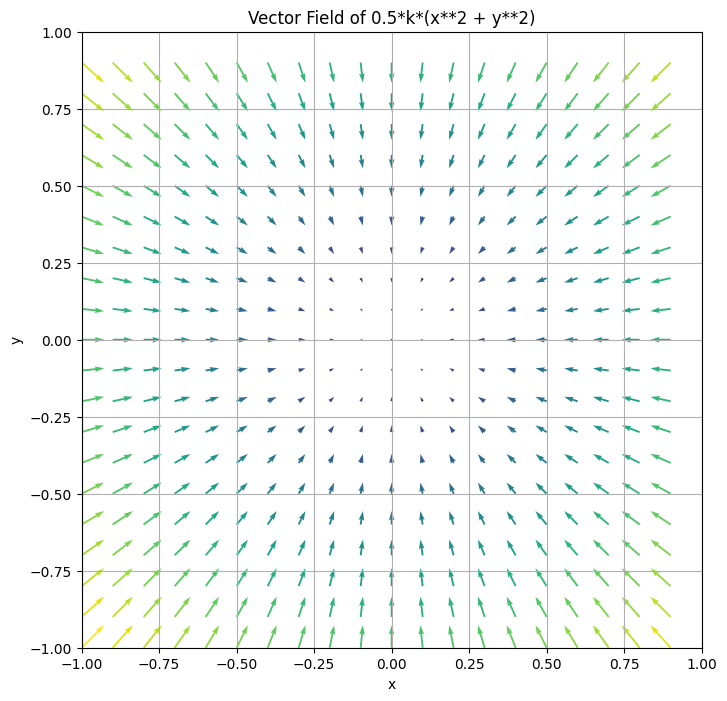

In [3]:
# As a vector field
plot_vec_field(1/2*k*(x**2+y**2), zero = True)

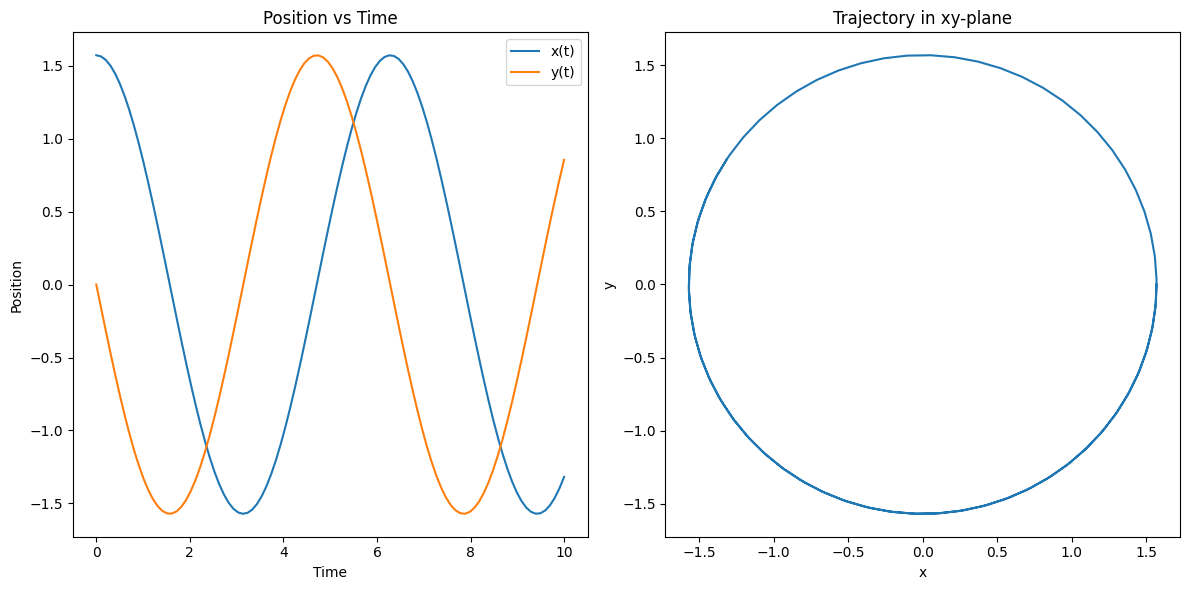

In [4]:
# Circular motion solved as system of 1st order ODEs

def rhs(X, t, w):
    x1, x2 = X
    dx1dt = x2
    dx2dt = -w**2*x1
    return [dx1dt, dx2dt]

X0 = [np.pi/2, 0]
t = np.linspace(0, 10, 100)
w = 1

# Solving
solution = odeint(rhs, X0, t, args=(w,))

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting x and y positions
plt.subplot(1, 2, 1)
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()

# Plotting the trajectory in the xy-plane
plt.subplot(1, 2, 2)
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory in xy-plane')

plt.tight_layout()
plt.show()

## $V = \frac{k}{2(x^{2}+y^{2})}$ Visualizations

Fx = 4*k*x/(2*x**2 + 2*y**2)**2
Fy = 4*k*y/(2*x**2 + 2*y**2)**2


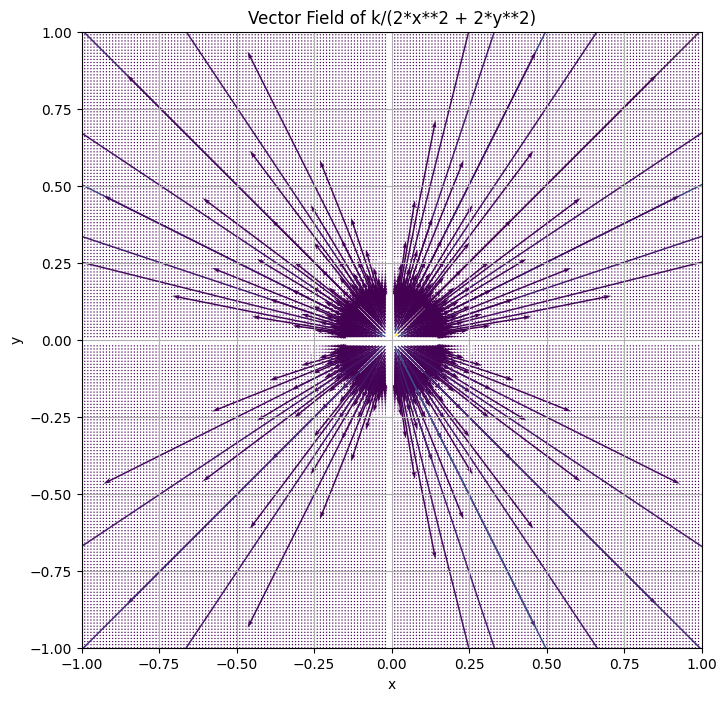

In [5]:
# as a vector field
plot_vec_field(k/(2*(x**2+y**2)), r = 1, step = 0.01, K = 0.1)

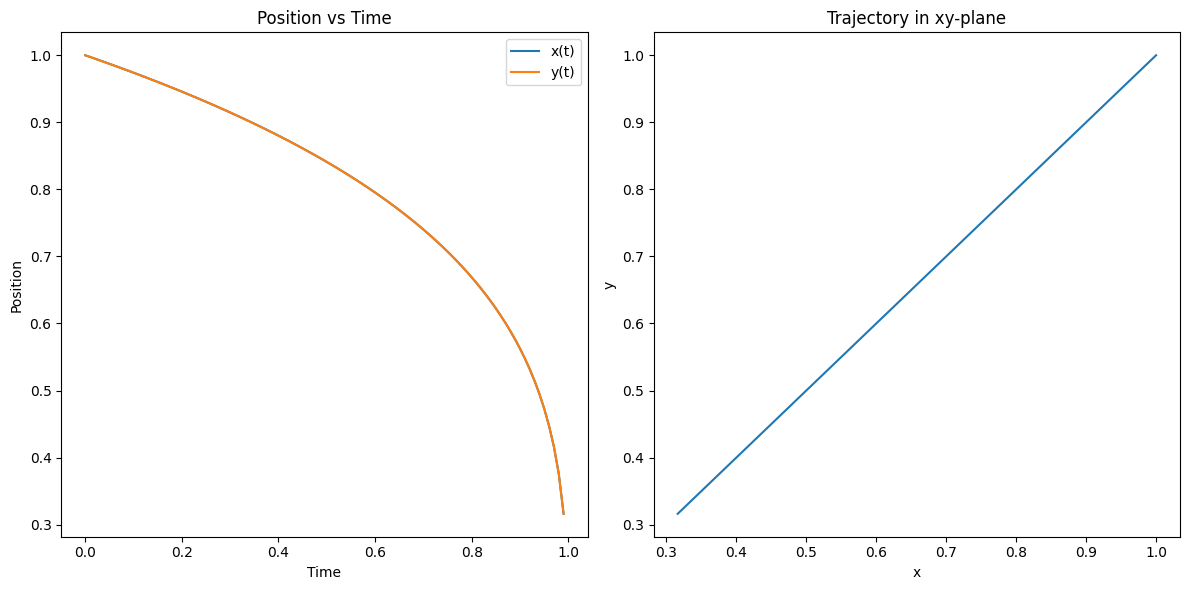

In [6]:
x, y, k, m = symbols('x y k m')

# Defining the potential energy function V
V = k / (2 * (x**2 + y**2))

Vx = diff(V, x)
Vy = diff(V, y)

# Accelerations
ax = 4 * k * x / (m * (x**2 + y**2)**2)
ay = 4 * k * y / (m * (x**2 + y**2)**2)

# Converting to numerical functions using lambdify
vx_func = lambdify((x, y, k), Vx, 'numpy')
vy_func = lambdify((x, y, k), Vy, 'numpy')
ax_func = lambdify((x, y, k, m), ax, 'numpy')
ay_func = lambdify((x, y, k, m), ay, 'numpy')

# Updated system function using the numerical functions
def system(Y, t, m, k):
    x, y, vx, vy = Y
    dxdt = vx_func(x, y, k)
    dydt = vy_func(x, y, k)
    dvxdt = ax_func(x, y, k, m)
    dvydt = ay_func(x, y, k, m)
    return [dxdt, dydt, dvxdt, dvydt]

# Initial conditions
Y = [1, 1, 0, 0]

t = np.arange(0, 1, 0.01)

# Solving the differential equations with the same initial conditions and time range
solution = odeint(system, Y, t, args=(1, 1))

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting x and y positions
plt.subplot(1, 2, 1)
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()

# Plotting the trajectory in the xy-plane
plt.subplot(1, 2, 2)
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory in xy-plane')

plt.tight_layout()
plt.show()
